# Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data

In [3]:
df = pd.read_excel('UFO observation statistics.xlsx')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              80332 non-null  datetime64[ns]
 1   city                  80332 non-null  object        
 2   state                 74535 non-null  object        
 3   country               70662 non-null  object        
 4   shape                 78400 non-null  object        
 5   duration (seconds)    80332 non-null  object        
 6   duration (hours/min)  80331 non-null  object        
 7   comments              80316 non-null  object        
 8   date posted           80332 non-null  datetime64[ns]
 9   latitude              80332 non-null  object        
 10  longitude             80332 non-null  float64       
dtypes: datetime64[ns](2), float64(1), object(8)
memory usage: 6.7+ MB


In [5]:
df.head(10)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.38421,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.2,-2.916667
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611
5,1961-10-10 19:00:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,2007-04-27,36.595,-82.188889
6,1965-10-10 21:00:00,penarth (uk/wales),NaN,gb,circle,180,about 3 mins,penarth uk circle 3mins stayed 30ft above m...,2006-02-14,51.434722,-3.180000
7,1965-10-10 23:45:00,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,1999-10-02,41.1175,-73.408333
8,1966-10-10 20:00:00,pell city,al,us,disk,180,3 minutes,Strobe Lighted disk shape object observed clos...,2009-03-19,33.586111,-86.286111
9,1966-10-10 21:00:00,live oak,fl,us,disk,120,several minutes,Saucer zaps energy from powerline as my pregna...,2005-05-11,30.294722,-82.984167


# Data Preparing

### replacing NaN values with empty values to make unique code in new column

In [6]:
for i in ['country', 'state']:
    df[i] = df[i].replace(np.nan, '')

### deleting duplicated rows

In [7]:
df = df.drop_duplicates(subset=['datetime', 'latitude', 'longitude'])

### changing state and country values to uppercases

In [8]:
for i in ['country', 'state']:
    df[i] = df[i].str.upper()

### adding potentialy missing country codes

In [9]:
countries = {
    r'\(united states\)': 'US',
    r'\(united kingdom\)': 'GB',
    r'\(uk/england\)': 'GB',
    r'\(uk/scotland\)': 'GB',
    r'\(uk/wales\)': 'GB',
    r'\(germany\)': 'DE',
    r'\(france\)': 'FR',
    r'\(spain\)': 'ES',
    r'\(italy\)': 'IT',
    r'\(canada\)': 'CA',
    r'\(australia\)': 'AU',
    r'\(mexico\)': 'MX',
    r'\(brazil\)': 'BR',
    r'\(poland\)': 'PL',
    r'\(netherlands\)': 'NL',
    r'\(belgium\)': 'BE',
    r'\(sweden\)': 'SE',
    r'\(norway\)': 'NO',
    r'\(denmark\)': 'DK',
    r'\(finland\)': 'FI',
    r'\(ireland\)': 'IE',
    r'\(switzerland\)': 'CH',
    r'\(austria\)': 'AT',
    r'\(new zealand\)': 'NZ',
    r'\(russia\)': 'RU',
    r'\(japan\)': 'JP',
    r'\(china\)': 'CN',
    r'\(south korea\)': 'KR',
    r'\(india\)': 'IN',
    r'\(south africa\)': 'ZA',
    r'\(argentina\)': 'AR',
    r'\(chile\)': 'CL',
    r'\(colombia\)': 'CO',
    r'\(portugal\)': 'PT',
    r'\(czech republic\)': 'CZ',
    r'\(hungary\)': 'HU',
    r'\(greece\)': 'GR',
    r'\(turkey\)': 'TR',
    r'\(ukraine\)': 'UA'
}

for country, code in countries.items():
    mask = (df['country'] == '') & df['city'].str.contains(country, case = False)
    df.loc[mask, 'country'] = code

states = {
    'US': ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 
           'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 
           'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'],
    'CA': ['AB', 'BC', 'MB', 'NB', 'NL', 'NS', 'NT', 'ON', 'PE', 'QC', 'SK', 'YT', 'YK', 'PQ', 'NF'],
    'AU': ['SA']
}

for country_code, state_codes in states.items():
    mask = (df['country'] == '') & df['state'].isin(state_codes)
    df.loc[mask, 'country'] = country_code

### adding new column with mixed 'country (state)' code

In [10]:
df['country (state)'] = np.where(df['state'] == '', df['country'], df['country'] + " (" + df['state'] + ")")

### deleting rows with unknown country

In [11]:
df = df[df['country'] != '']

### replacing NaN values in shape column to 'unknown' value and small fixes

In [12]:
df.loc[df['shape'].isna(), 'shape'] ='unknown'
df.loc[df['shape'] == 'changed', 'shape'] = 'changing'

### deleting cases with duration over 3600 seconds

In [13]:
df['duration (seconds)'] = pd.to_numeric(df['duration (seconds)'], errors = 'coerce') # changing any trash data to nan
df = df.dropna(subset = ['duration (seconds)']) # deleting nan data
df['duration (seconds)'] = df['duration (seconds)'].astype(int) # changing to int type
df = df[df['duration (seconds)'] <= 3600]

#small fix in latitude column, changing type to column by deleting trash rows
df['latitude'] = pd.to_numeric(df['latitude'], errors = 'coerce')
df = df.dropna(subset = ['latitude']) 
df['latitude'] = df['latitude'].astype(float)

### adding case_id column and deleting useless columns

In [14]:
df = df.reset_index(drop = True)
df['case id'] = df.index + 1

In [15]:
df = df.drop(columns = ['duration (hours/min)', 'comments', 'date posted'])

In [16]:
df = df.rename(columns = {'datetime': 'date reported'})
df = df[['case id', 'date reported', 'city', 'state', 'country', 'shape', 'country (state)', 'duration (seconds)', 'latitude', 'longitude']] # rearranging columns

# Data Analysis

## 1. What kind of UFO shapes are the most often observed?

------------------------------------------------------------------------------------------------------------------------------------------------------ 
                     if we do not count "light" as a shape then definitely the most often observed shapes are triangles and circles                     
 ------------------------------------------------------------------------------------------------------------------------------------------------------


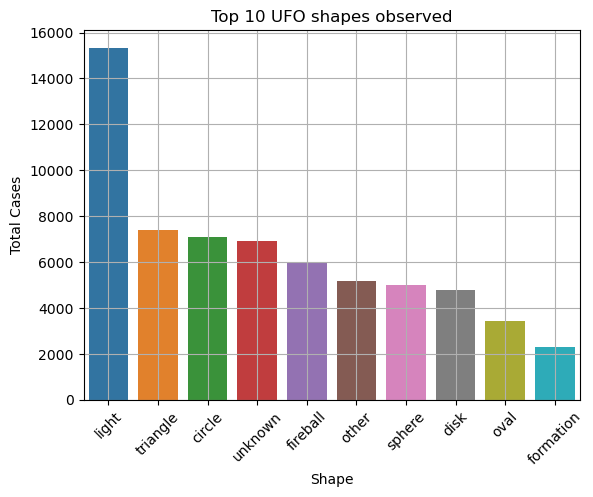

In [17]:
# function for print answer
def print_sample(x: str) -> str:
    center = x.center(150)
    text = print(150*'-', '\n', center, '\n', 150*'-')
    return text

df_question1 = df.groupby('shape').agg(
    Total_cases = ('case id', 'count'))
df_question1 = df_question1.sort_values('Total_cases', ascending = False).head(10)

sns.barplot(data = df_question1, x = 'shape', y = 'Total_cases', hue = 'shape')
plt.xticks(rotation = 45)
plt.grid(True)
plt.xlabel('Shape')
plt.ylabel('Total Cases')
plt.title('Top 10 UFO shapes observed')
print_sample('if we do not count "light" as a shape then definitely the most often observed shapes are triangles and circles')
plt.show()

## 2. Which US states report the most UFO sightings?

------------------------------------------------------------------------------------------------------------------------------------------------------ 
 California has the highest number of reported UFO sightings — twice as many as the second-highest state. Other states with a significant number of sightings are Florida, Washington, Texas and New York 
 ------------------------------------------------------------------------------------------------------------------------------------------------------


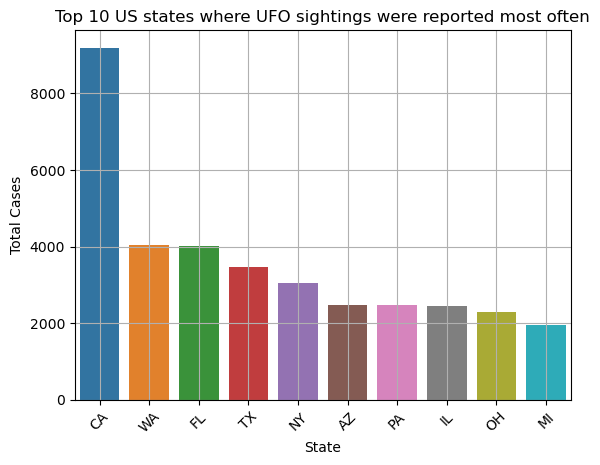

In [18]:
df_question2 = df[df['country'] == 'US'].groupby('state').agg(
    Total_cases = ('case id', 'count'))
df_question2 = df_question2.sort_values('Total_cases', ascending = False).head(10)

sns.barplot(data = df_question2, x = 'state', y = 'Total_cases', hue = 'state')
plt.xticks(rotation = 45)
plt.grid(True)
plt.xlabel('State')
plt.ylabel('Total Cases')
plt.title('Top 10 US states where UFO sightings were reported most often')
print_sample('California has the highest number of reported UFO sightings — twice as many as the second-highest state. Other states with a significant number of sightings are Florida, Washington, Texas and New York')
plt.show()

## 3. How have the yearly trends in UFO sightings developed since the year 1990?

------------------------------------------------------------------------------------------------------------------------------------------------------ 
   we can see that the trend in reported sightings has been consistently increasing since 1990, except 2014 (but data isnt fully completed that year)   
 ------------------------------------------------------------------------------------------------------------------------------------------------------


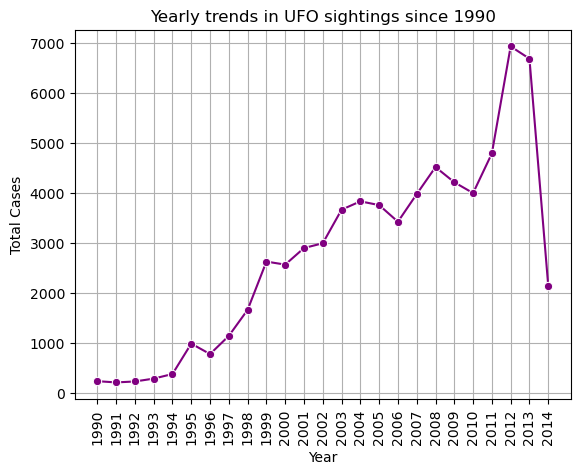

In [19]:
df_question3 = df.groupby(df['date reported'].dt.year).agg(
    Total_cases = ('case id', 'count'))
df_question3.reset_index(inplace = True)
df_question3 = df_question3[df_question3['date reported'] >= 1990].reset_index(drop = True)

sns.lineplot(data = df_question3, x = 'date reported', y = 'Total_cases', marker = 'o', color = 'purple')
plt.grid(True)
plt.xticks(ticks = range(1990,2015,1), rotation = 90)
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.title('Yearly trends in UFO sightings since 1990')
print_sample('we can see that the trend in reported sightings has been consistently increasing since 1990, except 2014 (but data isnt fully completed that year)')
plt.show()

## 4. How long was the UFO observed?

------------------------------------------------------------------------------------------------------------------------------------------------------ 
              Most sightings are very short (under 1 minute), but there are also many cases where the UFO was observed for 5/10/15 minutes              
 ------------------------------------------------------------------------------------------------------------------------------------------------------


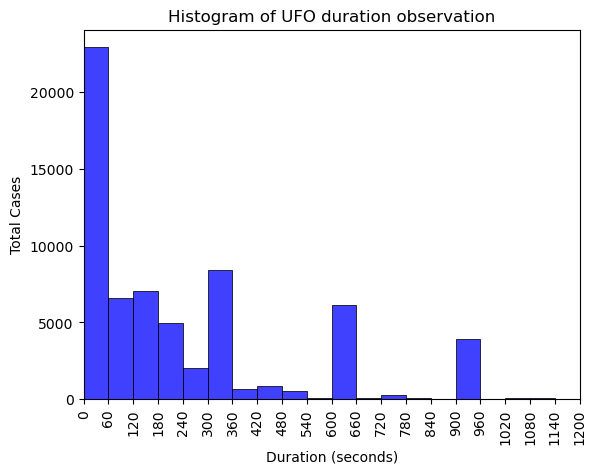

In [20]:
sns.histplot(df['duration (seconds)'], bins = 60, color = 'blue')
plt.xticks(ticks = range(0,1201,60), rotation = 90)
plt.xlim(0,1200)
plt.ylabel('Total Cases')
plt.xlabel('Duration (seconds)')
plt.title('Histogram of UFO duration observation')
print_sample('Most sightings are very short (under 1 minute), but there are also many cases where the UFO was observed for 5/10/15 minutes')
plt.show()



## 5. Are the statistics different in other countries if we exclude the US country from statistics?

------------------------------------------------------------------------------------------------------------------------------------------------------ 
                                                   in terms of UFO shape, statistics are very similar                                                   
 ------------------------------------------------------------------------------------------------------------------------------------------------------


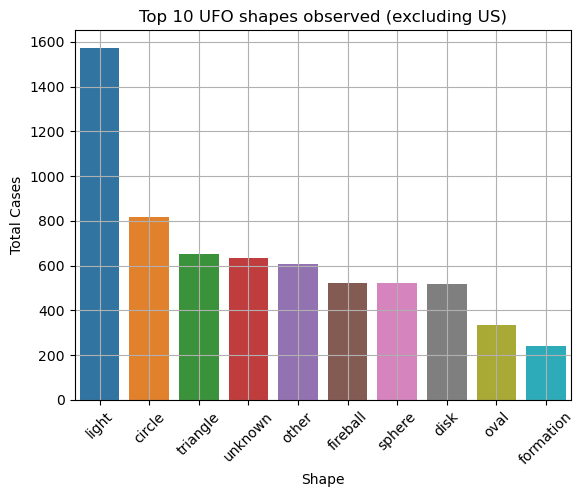

In [21]:
df_question51 = df[df['country'] != 'US'].groupby('shape').agg(
    Total_cases = ('case id', 'count'))
df_question51 = df_question51.sort_values('Total_cases', ascending = False).head(10)

sns.barplot(data = df_question51, x = 'shape', y = 'Total_cases', hue = 'shape')
plt.xticks(rotation = 45)
plt.grid(True)
plt.xlabel('Shape')
plt.ylabel('Total Cases')
plt.title('Top 10 UFO shapes observed (excluding US)')
print_sample('in terms of UFO shape, statistics are very similar')
plt.show()

------------------------------------------------------------------------------------------------------------------------------------------------------ 
              When US is excluded from statistics, then England, Canada and Australia are countries where UFO sightings were most reported              
 ------------------------------------------------------------------------------------------------------------------------------------------------------


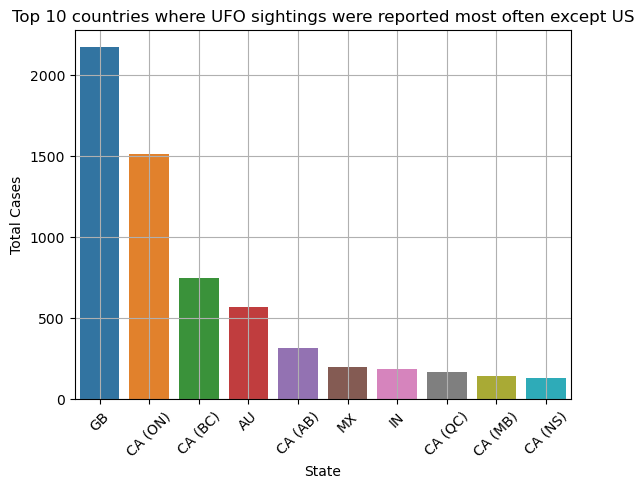

In [22]:
df_question52 = df[df['country'] != 'US'].groupby('country (state)').agg(
    Total_cases = ('case id', 'count'))
df_question52 = df_question52.sort_values('Total_cases', ascending = False).head(10)

sns.barplot(data = df_question52, x = 'country (state)', y = 'Total_cases', hue = 'country (state)')
plt.xticks(rotation = 45)
plt.grid(True)
plt.xlabel('State')
plt.ylabel('Total Cases')
plt.title('Top 10 countries where UFO sightings were reported most often except US')
print_sample('When US is excluded from statistics, then England, Canada and Australia are countries where UFO sightings were most reported')
plt.show()

------------------------------------------------------------------------------------------------------------------------------------------------------ 
                            data is pretty different if we exclude US cases, it reached a peak in 2003 and started dropping                             
 ------------------------------------------------------------------------------------------------------------------------------------------------------


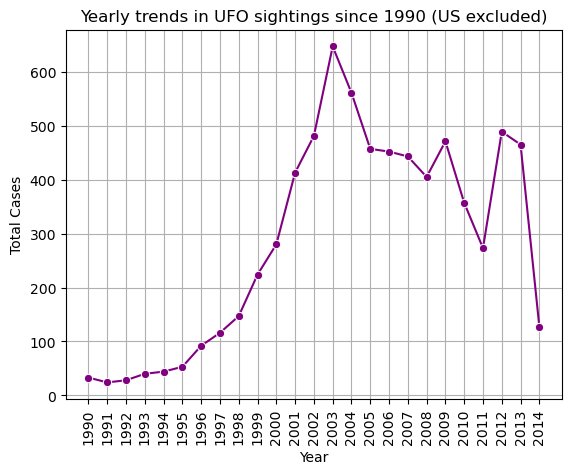

In [23]:
df_question53 = df[df['country'] != 'US']
df_question53 = df_question53.groupby(df_question53['date reported'].dt.year).agg(
    Total_cases = ('case id', 'count'))
df_question53.reset_index(inplace = True)
df_question53 = df_question53[df_question53['date reported'] >= 1990].reset_index(drop = True)

sns.lineplot(data = df_question53, x = 'date reported', y = 'Total_cases', marker = 'o', color = 'purple')
plt.grid(True)
plt.xticks(ticks = range(1990,2015,1), rotation = 90)
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.title('Yearly trends in UFO sightings since 1990 (US excluded)')
print_sample('data is pretty different if we exclude US cases, it reached a peak in 2003 and started dropping')
plt.show()

------------------------------------------------------------------------------------------------------------------------------------------------------ 
                                        There is no difference in data in terms of duration of the USO sighting                                         
 ------------------------------------------------------------------------------------------------------------------------------------------------------


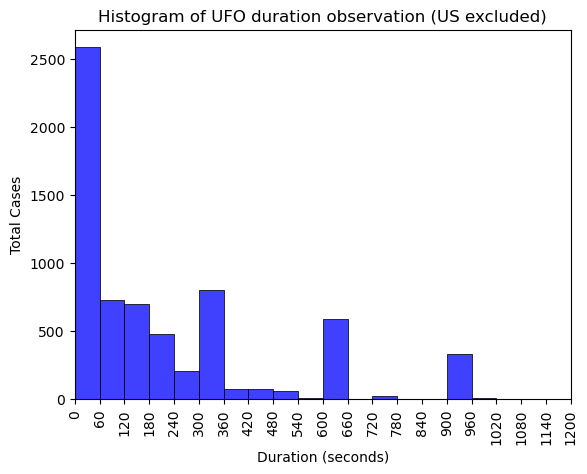

In [24]:
df_question54 = df[df['country'] != 'US']

sns.histplot(df_question54['duration (seconds)'], bins = 60, color = 'blue')
plt.xticks(ticks = range(0,1201,60), rotation = 90)
plt.xlim(0,1200)
plt.ylabel('Total Cases')
plt.xlabel('Duration (seconds)')
plt.title('Histogram of UFO duration observation (US excluded)')
print_sample('There is no difference in data in terms of duration of the USO sighting')
plt.show()
